In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Total WA sales by calendar year
fy2015 = "fy2015_WA_retail_revenue_by_county.csv"
fy2016 = "cleaned_fy2016_WA_retail_revenue_by_county.csv"
fy2017 = "cleaned_fy2017_WA_retail_revenue_by_county.csv"
crime_read= "df_crime_sorted.csv"
county_population = "ofm_april1_postcensal_estimates_pop.csv"
classification_file = "class_county.csv"


fy2015_df = pd.read_csv(fy2015)
fy2016_df = pd.read_csv(fy2016)
fy2017_df = pd.read_csv(fy2017)
population_df = pd.read_csv(county_population)
classification = pd.read_csv(classification_file)


In [3]:
# Dropping useless columns
classification = classification.drop(columns=["April 1, 2014 Population (OFM)"])

# Renaming column to be easier to read
classification = classification.rename(index=str, 
                                       columns={"2013 Metropolitan, Micropolitan, Noncore (OMB)": "Classification"})

# Uppercase county column in order to be able to merge
classification["County"] = classification["County"].str.upper()

In [4]:
population_df['County'] = population_df['County'].str.upper()

#merge population data with fy2015 data
Pop_and_fy2015_merge=pd.merge(population_df, fy2015_df, on='County')
Pop_and_fy2015_merge

,County,2015,2016,2017,Reporting Period,Total Sales,Excise Tax
0,ASOTIN,22010,22150,22290,7/1/2014 - 6/30/2015,"$78,390","$19,597"
1,BENTON,188590,190500,193500,7/1/2014 - 6/30/2015,"$2,840,372","$710,093"
2,CHELAN,75030,75910,76830,7/1/2014 - 6/30/2015,"$1,392,079","$348,020"
3,CLALLAM,72650,73410,74240,7/1/2014 - 6/30/2015,"$1,400,405","$350,101"
4,CLARK,451820,461010,471000,7/1/2014 - 6/30/2015,"$24,732,262","$6,183,065"
5,COWLITZ,104280,104850,105900,7/1/2014 - 6/30/2015,"$4,583,662","$1,145,915"
6,DOUGLAS,39990,40720,41420,7/1/2014 - 6/30/2015,"$1,513,797","$378,449"
7,GRANT,93930,94610,95630,7/1/2014 - 6/30/2015,"$1,325,700","$331,425"
8,GRAYS HARBOR,73110,72820,72970,7/1/2014 - 6/30/2015,"$980,429","$245,107"
9,ISLAND,80600,82910,82790,7/1/2014 - 6/30/2015,"$1,185,035","$296,259"


In [5]:
#merge previous population+2017 fy data with 2016 fy data
Pop_and_fy2016_merge=pd.merge(Pop_and_fy2015_merge, fy2016_df, on='County')
Pop_and_fy2016_merge

,County,2015,2016,2017,Reporting Period_x,Total Sales_x,Excise Tax,Unnamed: 0,Reporting Period_y,Total Sales_y,Excise Tax
0,ASOTIN,22010,22150,22290,7/1/2014 - 6/30/2015,"$78,390","$19,597",0,07/01/2015 - 06/30/2016,"$2,390,504","$884,487"
1,BENTON,188590,190500,193500,7/1/2014 - 6/30/2015,"$2,840,372","$710,093",1,07/01/2015 - 06/30/2016,"$4,970,194","$1,838,972"
2,CHELAN,75030,75910,76830,7/1/2014 - 6/30/2015,"$1,392,079","$348,020",2,07/01/2015 - 06/30/2016,"$4,801,762","$1,776,652"
3,CLALLAM,72650,73410,74240,7/1/2014 - 6/30/2015,"$1,400,405","$350,101",3,07/01/2015 - 06/30/2016,"$5,217,200","$1,930,364"
4,CLARK,451820,461010,471000,7/1/2014 - 6/30/2015,"$24,732,262","$6,183,065",4,07/01/2015 - 06/30/2016,"$46,119,692","$17,064,286"
5,COWLITZ,104280,104850,105900,7/1/2014 - 6/30/2015,"$4,583,662","$1,145,915",5,07/01/2015 - 06/30/2016,"$9,996,138","$3,698,571"
6,DOUGLAS,39990,40720,41420,7/1/2014 - 6/30/2015,"$1,513,797","$378,449",6,07/01/2015 - 06/30/2016,"$1,697,135","$627,940"
7,GRANT,93930,94610,95630,7/1/2014 - 6/30/2015,"$1,325,700","$331,425",9,07/01/2015 - 06/30/2016,"$3,715,477","$1,374,727"
8,GRAYS HARBOR,73110,72820,72970,7/1/2014 - 6/30/2015,"$980,429","$245,107",10,07/01/2015 - 06/30/2016,"$6,323,625","$2,339,741"
9,ISLAND,80600,82910,82790,7/1/2014 - 6/30/2015,"$1,185,035","$296,259",11,07/01/2015 - 06/30/2016,"$5,730,021","$2,120,108"


In [6]:
#merge previous population+2016 fy data with 2015 fy data
final_merge=pd.merge(Pop_and_fy2016_merge, fy2017_df, on='County')
final_merge

,County,2015,2016,2017,Reporting Period_x,Total Sales_x,Excise Tax,Unnamed: 0_x,Reporting Period_y,Total Sales_y,Excise Tax_x,Unnamed: 0_y,Reporting Period,Total Sales,Excise Tax_y
0,ASOTIN,22010,22150,22290,7/1/2014 - 6/30/2015,"$78,390","$19,597",0,07/01/2015 - 06/30/2016,"$2,390,504","$884,487",1,07/01/2016 - 06/30/2017,"$7,901,349.03","$2,923,499.13"
1,BENTON,188590,190500,193500,7/1/2014 - 6/30/2015,"$2,840,372","$710,093",1,07/01/2015 - 06/30/2016,"$4,970,194","$1,838,972",2,07/01/2016 - 06/30/2017,"$14,867,438.10","$5,500,952.10"
2,CHELAN,75030,75910,76830,7/1/2014 - 6/30/2015,"$1,392,079","$348,020",2,07/01/2015 - 06/30/2016,"$4,801,762","$1,776,652",3,07/01/2016 - 06/30/2017,"$7,449,552.84","$2,756,334.63"
3,CLALLAM,72650,73410,74240,7/1/2014 - 6/30/2015,"$1,400,405","$350,101",3,07/01/2015 - 06/30/2016,"$5,217,200","$1,930,364",4,07/01/2016 - 06/30/2017,"$10,671,708.82","$3,948,532.28"
4,CLARK,451820,461010,471000,7/1/2014 - 6/30/2015,"$24,732,262","$6,183,065",4,07/01/2015 - 06/30/2016,"$46,119,692","$17,064,286",5,07/01/2016 - 06/30/2017,"$56,832,141.35","$21,027,892.30"
5,COWLITZ,104280,104850,105900,7/1/2014 - 6/30/2015,"$4,583,662","$1,145,915",5,07/01/2015 - 06/30/2016,"$9,996,138","$3,698,571",6,07/01/2016 - 06/30/2017,"$14,851,660.48","$5,495,114.38"
6,DOUGLAS,39990,40720,41420,7/1/2014 - 6/30/2015,"$1,513,797","$378,449",6,07/01/2015 - 06/30/2016,"$1,697,135","$627,940",7,07/01/2016 - 06/30/2017,"$2,522,689.32","$933,395.05"
7,GRANT,93930,94610,95630,7/1/2014 - 6/30/2015,"$1,325,700","$331,425",9,07/01/2015 - 06/30/2016,"$3,715,477","$1,374,727",9,07/01/2016 - 06/30/2017,"$7,815,680.27","$2,891,801.72"
8,GRAYS HARBOR,73110,72820,72970,7/1/2014 - 6/30/2015,"$980,429","$245,107",10,07/01/2015 - 06/30/2016,"$6,323,625","$2,339,741",10,07/01/2016 - 06/30/2017,"$11,364,874.91","$4,205,003.72"
9,ISLAND,80600,82910,82790,7/1/2014 - 6/30/2015,"$1,185,035","$296,259",11,07/01/2015 - 06/30/2016,"$5,730,021","$2,120,108",11,07/01/2016 - 06/30/2017,"$8,662,918.55","$3,205,279.85"


In [7]:
#Rename the final merge df to categorize population and sales
renamed_df = final_merge.rename(columns={"2014":"Pop 2014", "2015":"Pop 2015", "2016":"Pop 2016", "2017":"Pop 2017", "Total Sales":"Sales 2017", "Total Sales_x":"Sales 2015","Total Sales_y":"Sales 2016"})

#filter for desired columns
filtered_df=renamed_df[['County','Pop 2015','Pop 2016','Pop 2017','Sales 2015','Sales 2016','Sales 2017']]
filtered_df

,County,Pop 2015,Pop 2016,Pop 2017,Sales 2015,Sales 2016,Sales 2017
0,ASOTIN,22010,22150,22290,"$78,390","$2,390,504","$7,901,349.03"
1,BENTON,188590,190500,193500,"$2,840,372","$4,970,194","$14,867,438.10"
2,CHELAN,75030,75910,76830,"$1,392,079","$4,801,762","$7,449,552.84"
3,CLALLAM,72650,73410,74240,"$1,400,405","$5,217,200","$10,671,708.82"
4,CLARK,451820,461010,471000,"$24,732,262","$46,119,692","$56,832,141.35"
5,COWLITZ,104280,104850,105900,"$4,583,662","$9,996,138","$14,851,660.48"
6,DOUGLAS,39990,40720,41420,"$1,513,797","$1,697,135","$2,522,689.32"
7,GRANT,93930,94610,95630,"$1,325,700","$3,715,477","$7,815,680.27"
8,GRAYS HARBOR,73110,72820,72970,"$980,429","$6,323,625","$11,364,874.91"
9,ISLAND,80600,82910,82790,"$1,185,035","$5,730,021","$8,662,918.55"


In [8]:
#get sales/population per county's year
#convert df from string to float, first remove commas and dollar signs

try:
    filtered_df['Sales 2015']=filtered_df['Sales 2015'].str.replace('$','')
except:
    pass
try:
    filtered_df['Sales 2015']=filtered_df['Sales 2015'].str.replace(',','')
except:
    pass

filtered_df['Pop 2015']=filtered_df['Pop 2015'].astype('float')
filtered_df['Sales 2015']=filtered_df['Sales 2015'].astype('float')

sales_population_ratio_2015 = []
for x in range(0,30):
    formula = (filtered_df.iloc[x,4]) / (filtered_df.iloc[x,1])
    sales_population_ratio_2015.append(formula)
sales_population_ratio_2015


C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

[3.5615629259427535,
 15.061095498170635,
 18.5536318805811,
 19.27604955264969,
 54.73919259882254,
 43.955331799002685,
 37.85438859714929,
 14.11370169274992,
 13.410326904664204,
 14.702667493796525,
 49.575971502590676,
 23.463774356975836,
 19.117339271882262,
 32.21045230841341,
 64.34457142857143,
 2.71954082963736,
 5.8799196141479095,
 14.757118967988534,
 16.41037246581801,
 19.786186334505853,
 15.519530284301608,
 36.509053225004145,
 30.76062992125984,
 23.035669218585006,
 45.259112039483114,
 22.62679990915285,
 22.01825660970046,
 38.15953095953096,
 42.70198941798942,
 11.236956434772173]

In [9]:
#Sales per population for 2016

try:
    filtered_df['Sales 2016']=filtered_df['Sales 2016'].str.replace('$','')
except:
    pass
try:
    filtered_df['Sales 2016']=filtered_df['Sales 2016'].str.replace(',','')
except:
    pass

filtered_df['Pop 2016']=filtered_df['Pop 2016'].astype('float')
filtered_df['Sales 2016']=filtered_df['Sales 2016'].astype('float')

sales_population_ratio_2016 = []
for x in range(0,30):
    formula = (filtered_df.iloc[x,5]) / (filtered_df.iloc[x,2])
    sales_population_ratio_2016.append(formula)
sales_population_ratio_2016

C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

[107.92343115124153,
 26.090257217847768,
 63.255987353444866,
 71.0693366026427,
 100.0405457582265,
 95.33751072961374,
 41.67816797642436,
 39.27150406933728,
 86.83912386706949,
 69.11133759498252,
 101.83451270504986,
 71.92561778537836,
 67.31771583076278,
 89.60752688172043,
 103.50766337564644,
 26.612979581219925,
 61.70386713735559,
 43.18296189791517,
 39.80509915014164,
 58.30490236710914,
 40.30226715686275,
 89.32155066655761,
 86.05782608695652,
 64.51822839841627,
 117.07246056077803,
 44.88226757369615,
 71.11552678866111,
 81.52529406229415,
 110.23420942845223,
 28.353718612993223]

In [10]:
#Sales per population for 2017

try:
    filtered_df['Sales 2017']=filtered_df['Sales 2017'].str.replace('$','')
except:
    pass
try:
    filtered_df['Sales 2017']=filtered_df['Sales 2017'].str.replace(',','')
except:
    pass

filtered_df['Pop 2017']=filtered_df['Pop 2017'].astype('float')
filtered_df['Sales 2017']=filtered_df['Sales 2017'].astype('float')

sales_population_ratio_2017 = []
for x in range(0,30):
    formula = (filtered_df.iloc[x,6]) / (filtered_df.iloc[x,3])
    sales_population_ratio_2017.append(formula)
sales_population_ratio_2017

C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

[354.47954374158815,
 76.8343054263566,
 96.9615103475205,
 143.74607785560346,
 120.66272048832272,
 140.24230859301227,
 60.905101883148234,
 81.7283307539475,
 155.74722365355626,
 104.63725751902405,
 160.79039604591838,
 115.56368660444816,
 110.75520866439652,
 139.1813190252627,
 137.54455309325945,
 62.317528538223144,
 99.23759154929577,
 62.51193588221325,
 121.11580611764705,
 115.28502040958809,
 54.34056026650515,
 141.3424460918614,
 84.79793584260051,
 113.01272361287053,
 181.22810172068827,
 59.30327769040665,
 144.84398378475984,
 131.42588307905686,
 163.19665666118422,
 53.73172189723321]

In [11]:
#add sales/population ratios to df as new columns

ratio_2015 = pd.Series(sales_population_ratio_2015)
filtered_df['Ratio 2015'] = ratio_2015.values

ratio_2016 = pd.Series(sales_population_ratio_2016)
filtered_df['Ratio 2016'] = ratio_2016.values

ratio_2017 = pd.Series(sales_population_ratio_2017)
filtered_df['Ratio 2017'] = ratio_2017.values

#add_2015ratios=filtered_df.assign(Ratio2015 = sales_population_ratio_2015)
#add_2016ratios=filtered_df.assign(Ratio2016 = sales_population_ratio_2016)
#add_2015ratios=filtered_df.assign(Ratio2017 = sales_population_ratio_2017)

filtered_df
filtered_df.to_csv('Finalized County Sales Population.csv')


C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

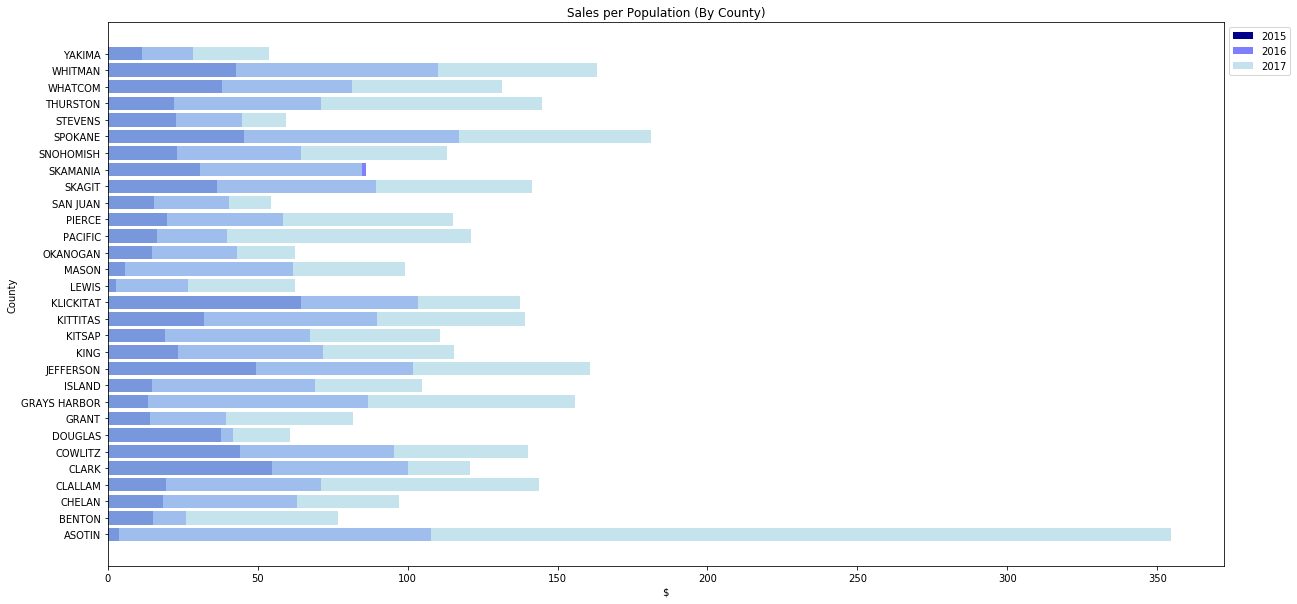

In [12]:
#plot
plt.figure(figsize =(20,10))
x_axis=filtered_df['County']
y_axis2015=filtered_df['Ratio 2015']
y_axis2016=filtered_df['Ratio 2016']
y_axis2017=filtered_df['Ratio 2017']

plt.barh(x_axis, y_axis2015, color='darkblue', label = '2015')
plt.barh(x_axis, y_axis2016, color='blue', alpha=.50, label = '2016')
plt.barh(x_axis, y_axis2017, color='lightblue', alpha=.70, label = '2017')

plt.title("Sales per Population (By County)")
plt.xlabel("$")
plt.ylabel("County")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout
#filtered_df.plot(x=x_axis, y=y_axis, kind='bar',figsize=(20,10))

In [13]:
filtered_county_type_df = pd.merge(filtered_df, classification, how="left", on=["County", "County"])
filtered_county_type_df.head()

,County,Pop 2015,Pop 2016,Pop 2017,Sales 2015,Sales 2016,Sales 2017,Ratio 2015,Ratio 2016,Ratio 2017,Classification
0,ASOTIN,22010.0,22150.0,22290.0,78390.0,2390504.0,7901349.03,3.561563,107.923431,354.479544,Metropolitan
1,BENTON,188590.0,190500.0,193500.0,2840372.0,4970194.0,14867438.10,15.061095,26.090257,76.834305,Metropolitan
2,CHELAN,75030.0,75910.0,76830.0,1392079.0,4801762.0,7449552.84,18.553632,63.255987,96.961510,Metropolitan
3,CLALLAM,72650.0,73410.0,74240.0,1400405.0,5217200.0,10671708.82,19.276050,71.069337,143.746078,Micropolitan
4,CLARK,451820.0,461010.0,471000.0,24732262.0,46119692.0,56832141.35,54.739193,100.040546,120.662720,Metropolitan


In [14]:
urban_revenue = filtered_county_type_df["Classification"]=="Metropolitan"
sub_revenue = filtered_county_type_df["Classification"]=="Micropolitan"
rural_revenue = filtered_county_type_df["Classification"]=="Noncore"

urban_revenue_df = filtered_county_type_df.loc[urban_revenue]
sub_revenue_df = filtered_county_type_df.loc[sub_revenue]
rural_revenue_df = filtered_county_type_df.loc[rural_revenue]

In [15]:
urban_revenue_df.head()

,County,Pop 2015,Pop 2016,Pop 2017,Sales 2015,Sales 2016,Sales 2017,Ratio 2015,Ratio 2016,Ratio 2017,Classification
0,ASOTIN,22010.0,22150.0,22290.0,78390.0,2390504.0,7901349.03,3.561563,107.923431,354.479544,Metropolitan
1,BENTON,188590.0,190500.0,193500.0,2840372.0,4970194.0,14867438.10,15.061095,26.090257,76.834305,Metropolitan
2,CHELAN,75030.0,75910.0,76830.0,1392079.0,4801762.0,7449552.84,18.553632,63.255987,96.961510,Metropolitan
4,CLARK,451820.0,461010.0,471000.0,24732262.0,46119692.0,56832141.35,54.739193,100.040546,120.662720,Metropolitan
5,COWLITZ,104280.0,104850.0,105900.0,4583662.0,9996138.0,14851660.48,43.955332,95.337511,140.242309,Metropolitan


In [16]:
urban_fy15_revenue = urban_revenue_df["Sales 2015"].sum()/1000000
urban_fy16_revenue = urban_revenue_df["Sales 2016"].sum()/1000000
urban_fy17_revenue = urban_revenue_df["Sales 2017"].sum()/1000000

sub_fy15_revenue = sub_revenue_df["Sales 2015"].sum()/1000000
sub_fy16_revenue = sub_revenue_df["Sales 2016"].sum()/1000000
sub_fy17_revenue = sub_revenue_df["Sales 2017"].sum()/1000000

rural_fy15_revenue = rural_revenue_df["Sales 2015"].sum()/1000000
rural_fy16_revenue = rural_revenue_df["Sales 2016"].sum()/1000000
rural_fy17_revenue = rural_revenue_df["Sales 2017"].sum()/1000000

IndexError: index 3 is out of bounds for axis 0 with size 3

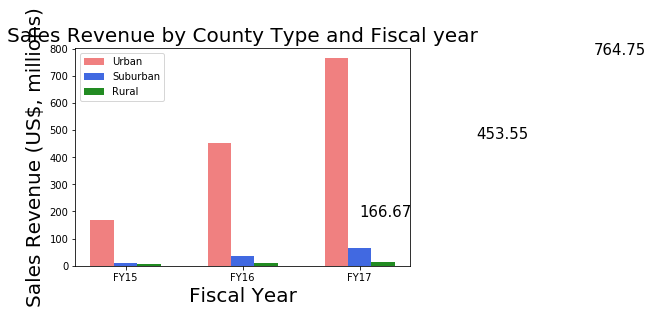

In [24]:
x_labels = ["FY15", "FY16", "FY17"]

x = np.arange(len(x_labels))
urban_y_list = [urban_fy15_revenue, urban_fy16_revenue, urban_fy17_revenue]
sub_y_list = [sub_fy15_revenue, sub_fy16_revenue, sub_fy17_revenue]
rural_y_list = [rural_fy15_revenue,rural_fy16_revenue, rural_fy17_revenue]

urban_plot = plt.bar(x - 0.2, urban_y_list, width=0.2, color = "lightcoral")
sub_plot = plt.bar(x, sub_y_list, width=0.2, color = "royalblue")
rural_plot = plt.bar(x + 0.2, rural_y_list, width=0.2, color = "forestgreen")

plt.xticks(x, x_labels)

plt.title("Sales Revenue by County Type and Fiscal year", fontsize=20)
plt.xlabel("Fiscal Year", fontsize=20)
plt.ylabel("Sales Revenue (US$, millions)", fontsize=20)
plt.legend((urban_plot, sub_plot, rural_plot), ('Urban', 'Suburban', 'Rural'))



plt.rc('figure', figsize = (20,10))

#plt.savefig("Marijuana Sales Revenue Over Time")